<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import csv dataset**

In [4]:
!wget https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv

--2022-03-24 06:21:15--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.002s  

2022-03-24 06:21:15 (14.5 MB/s) - ‘heart.csv’ saved [35921/35921]



**Import Libraries**

In [2]:
import pandas as pd

In [44]:
heartdisease = pd.read_csv("heart.csv")


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Create X and Y Data Frames**

In [30]:
Y = heartdisease["HeartDisease"] # Assign Y as last column

**Data Pre-Processing replace columns in X that are not numbers with
 numbers**

In [42]:
X = heartdisease.drop("HeartDisease",axis=1) # Assign X and drop the last column
X["Sex"].replace({"M":1,"F":2 }, inplace=True)
X["ChestPainType"].replace({"ATA":1,"NAP":2, "ASY":3, "TA":4}, inplace=True)
X["RestingECG"].replace({"Normal":1,"ST":2, "LVH": 3 }, inplace=True)
X["ExerciseAngina"].replace({"N":1,"Y":2 }, inplace=True)
X["ST_Slope"].replace({"Up":1,"Flat":2, "Down": 3 }, inplace=True)

heartdisease.isnull().sum() # Check if there are null values in the dataset
X


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Split Data**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(734, 11) (184, 11)
(734,) (184,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score

**Fit Logistic Regression model to Training Data**

In [35]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Predict test data using the model**

In [36]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [37]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))
print("Score: %.2f" % model.score(X_test,Y_test))

Coefficients:  [[ 2.56015356e-04 -1.12922235e+00  5.24296112e-01 -5.77459240e-03
  -3.59344118e-03  8.84175278e-01  1.14082846e-01 -1.70628568e-02
   1.04376179e+00  3.56729843e-01  1.41583893e+00]]
Intercept:  [-0.16388197]
Mean Squared Error: 0.14
Coefficient of Determination: 0.46
Score: 0.86


In [41]:
heartdisease.corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

In [38]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


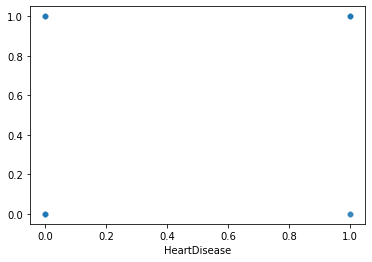

In [39]:
from matplotlib.pyplot import axis
sb.scatterplot(Y_test,Y_pred,alpha=0.2)
